In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Load Dataset

In [2]:
df = pd.read_csv('../../data/sierraleone-bumbuna.csv')
assert not df.empty, "Data import failed - DataFrame is empty!"

In [3]:
# First 5 rows
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


# Summary Statistics & Missing-Value Report


In [4]:
print("The description of the numeric columns:")
summary_stats = df.describe()
print(summary_stats)
# Overview of categorical columns
print("---------------------------------")
print("The description of the categorical columns:")
print(df.describe(include=['object']))
# Overview of all columns
print("---------------------------------")
print("The description of all columns:")
print(df.describe(include='all'))
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the last 5 rows")
print(df.tail())
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: a random sample of 5 rows")
print(df.sample(5))
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the shape of the dataset")
print(df.info())

# Total missing values per column
missing_values = df.isna().sum()
print("Missing values per column:")
print(missing_values)

# Flag columns with >5% nulls
total_rows = len(df)
high_null_cols = missing_values[missing_values > 0.05 * total_rows]
print("\nColumns with >5% nulls:")
print(high_null_cols)

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000

### Outlier Detection & Basic Cleaning


In [5]:
# Columns to check for outliers
sensor_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores and flag outliers
for col in sensor_cols:
    if col in df.columns:
        df[f'{col}_zscore'] = np.abs(stats.zscore(df[col]))
        df[f'{col}_outlier'] = df[f'{col}_zscore'] > 3

# Show outlier counts
print("Outlier counts per column:")
print(df[[f'{col}_outlier' for col in sensor_cols if f'{col}_outlier' in df]].sum())

Outlier counts per column:
GHI_outlier       2477
DNI_outlier       7586
DHI_outlier       2986
ModA_outlier      1604
ModB_outlier      2041
WS_outlier        3967
WSgust_outlier    3665
dtype: int64


Handle Missing values

In [6]:
for col in sensor_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Drop rows with missing timestamps
df = df.dropna(subset=['Timestamp'])

print("\nMissing values after cleaning:")
print(df[sensor_cols].isna().sum())


Missing values after cleaning:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


Remove or Correct Outliers

In [7]:
for col in sensor_cols:
    if col in df.columns:
        median_val = df[col].median()
        df.loc[df[f'{col}_outlier'], col] = median_val


# Drop Z-score columns (no longer needed)
df = df.drop(columns=[f'{col}_zscore' for col in sensor_cols if f'{col}_zscore' in df])
df = df.drop(columns=[f'{col}_outlier' for col in sensor_cols if f'{col}_outlier' in df])

Export Cleaned Data

In [8]:
import os

# Create data/ directory if it doesn't exist
os.makedirs('../../data/', exist_ok=True)

# Export (for Benin-Malanville)
output_path = '../../data/sierraleone-bumbuna_clean.csv'
df.to_csv(output_path, index=False)

print(f"\nCleaned data saved to {output_path}")


Cleaned data saved to ../../data/sierraleone-bumbuna_clean.csv


# Time Series Analysis


C:\Users\hp\AppData\Local\Temp\ipykernel_19208\3321510034.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('H').mean()


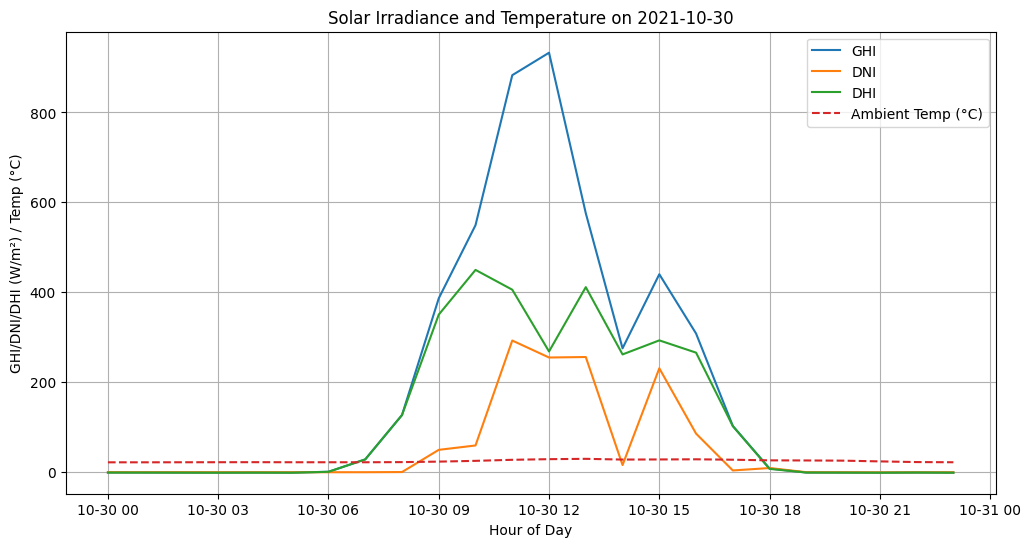

In [9]:
# Convert 'Timestamp' to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

# Resample to hourly averages (reduce noise for clearer trends)
df_hourly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('H').mean()

# Extract a single day (e.g., 2021-10-30)
single_day = df_hourly.loc['2021-10-30']

plt.figure(figsize=(12, 6))
plt.plot(single_day.index, single_day['GHI'], label='GHI')
plt.plot(single_day.index, single_day['DNI'], label='DNI')
plt.plot(single_day.index, single_day['DHI'], label='DHI')
plt.plot(single_day.index, single_day['Tamb'], label='Ambient Temp (°C)', linestyle='--')

plt.title('Solar Irradiance and Temperature on 2021-10-30')
plt.xlabel('Hour of Day')
plt.ylabel('GHI/DNI/DHI (W/m²) / Temp (°C)')
plt.legend()
plt.grid()
plt.show()

Anomaly Detection (Rolling Averages)



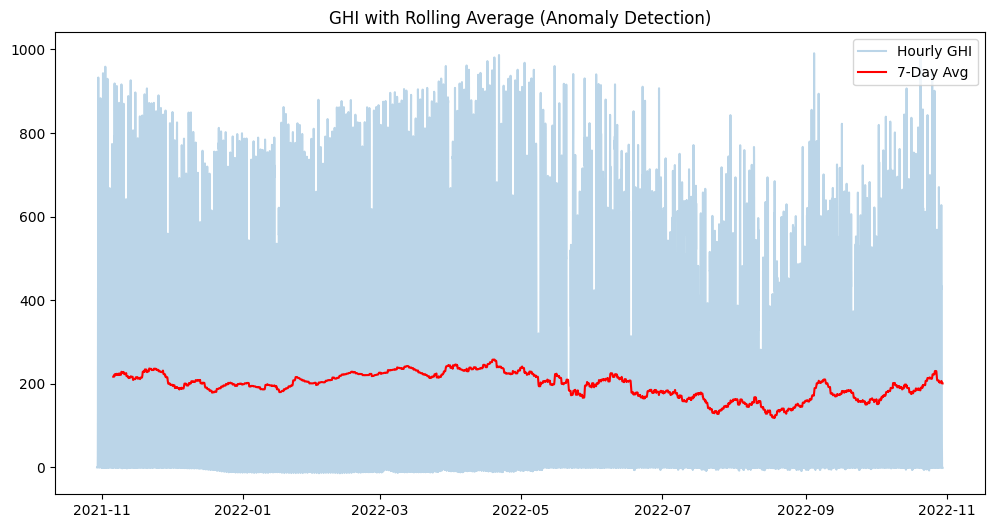

In [10]:
# 7-day rolling average for GHI
df_hourly['GHI_7day_avg'] = df_hourly['GHI'].rolling(window=7*24).mean()

# Plot anomalies (e.g., dips due to dust storms)
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='Hourly GHI', alpha=0.3)
plt.plot(df_hourly.index, df_hourly['GHI_7day_avg'], label='7-Day Avg', color='red')
plt.title('GHI with Rolling Average (Anomaly Detection)')
plt.legend()
plt.show()

Cleaning Impact Analysis



<Figure size 1200x600 with 0 Axes>

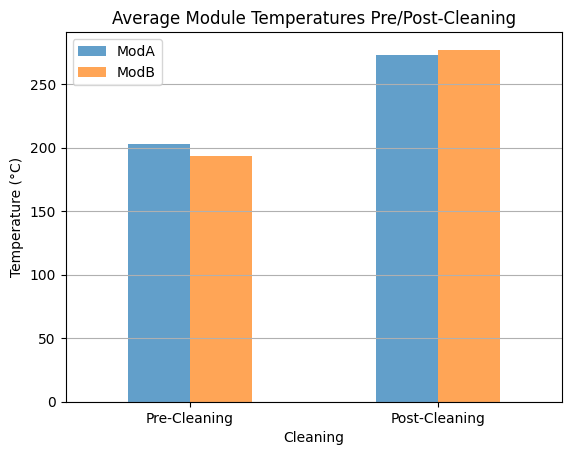

In [11]:
# Group by Cleaning flag and compare module temperatures
plt.figure(figsize=(12, 6))
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', alpha=0.7)
plt.title('Average Module Temperatures Pre/Post-Cleaning')
plt.ylabel('Temperature (°C)')
plt.xticks([0,1], ['Pre-Cleaning', 'Post-Cleaning'], rotation=0)
plt.grid(axis='y')
plt.show()

Correlation Heatmap



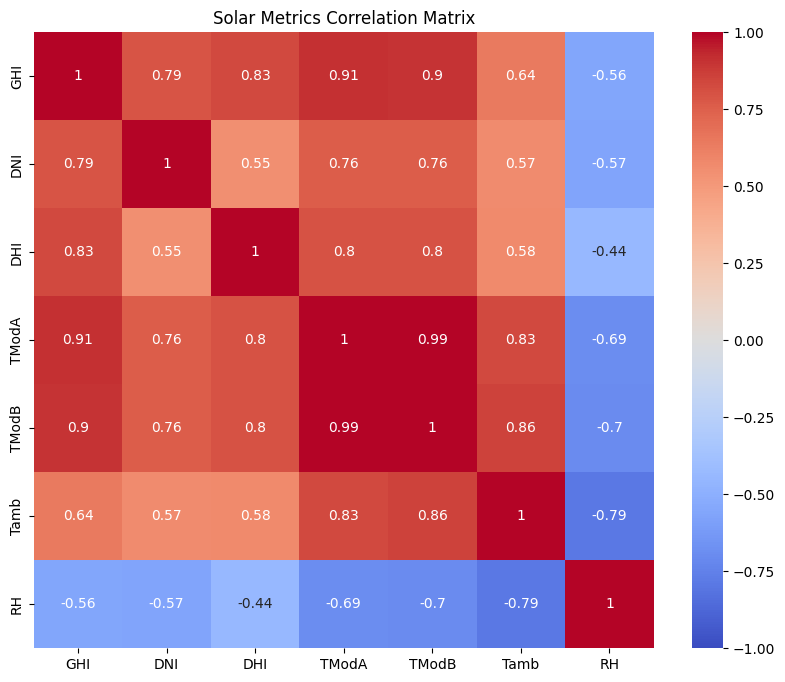

In [13]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH']
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Solar Metrics Correlation Matrix')
plt.show()


Scatter Plots

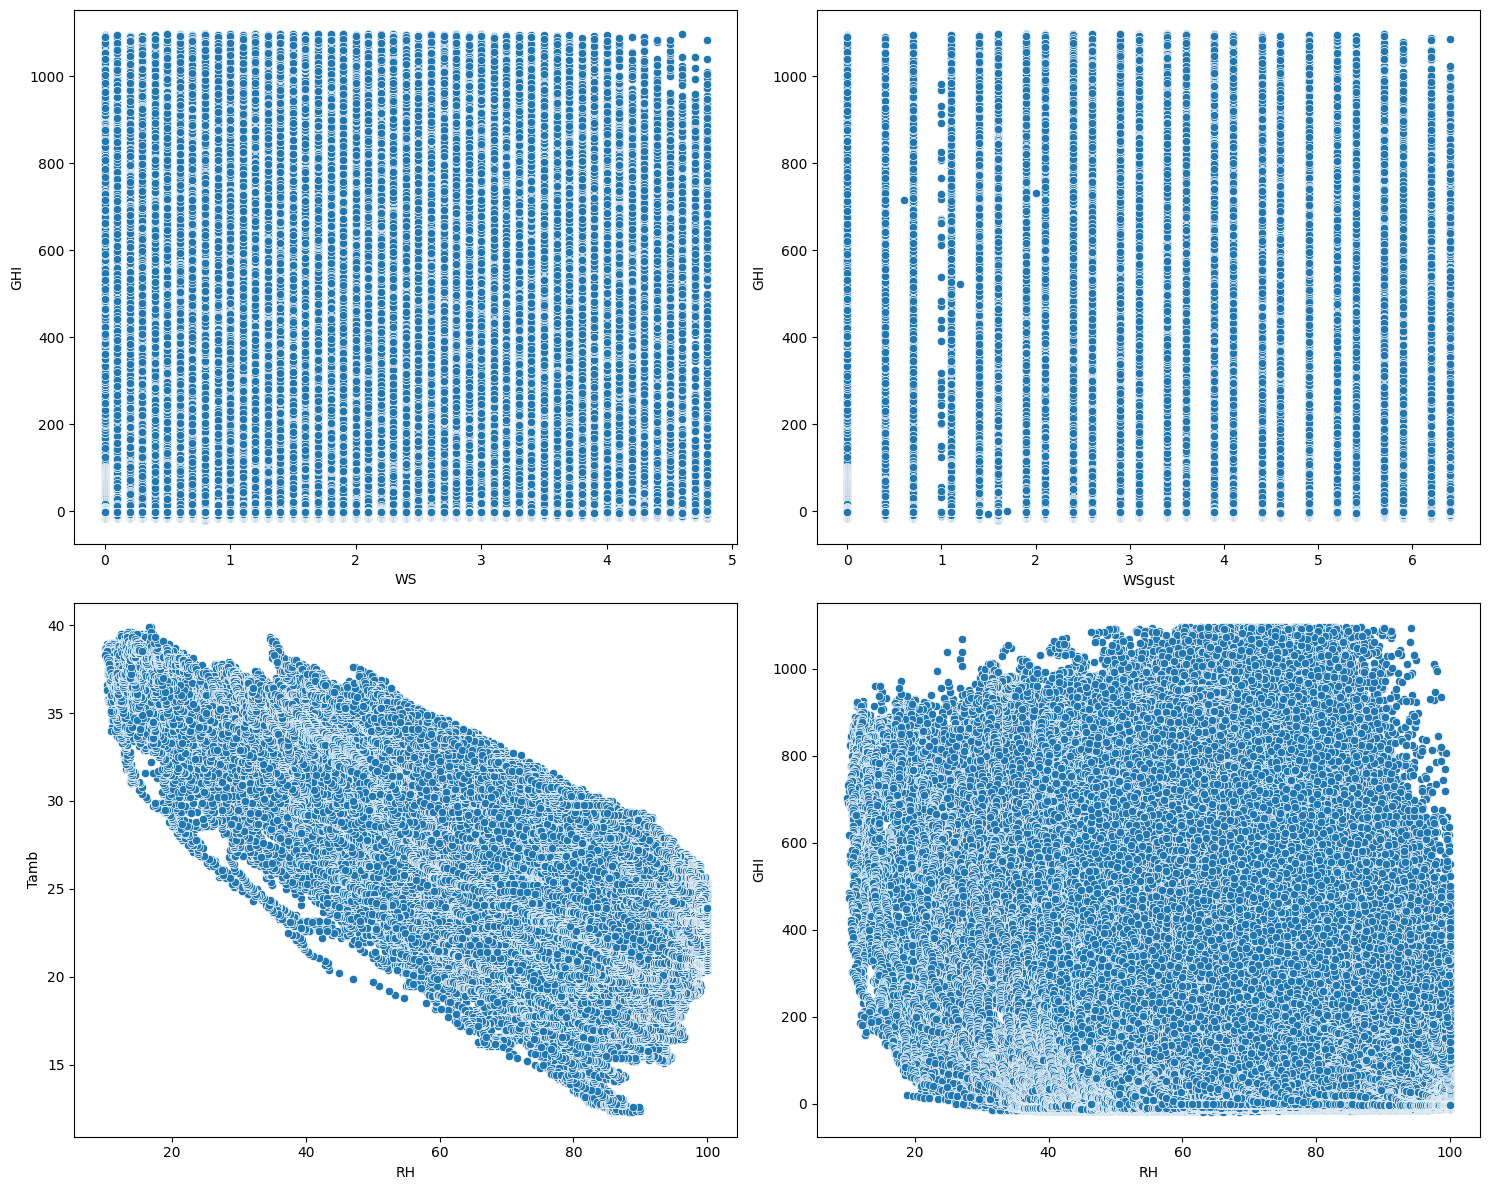

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Wind vs Irradiance
sns.scatterplot(data=df, x='WS', y='GHI', ax=ax[0,0])
sns.scatterplot(data=df, x='WSgust', y='GHI', ax=ax[0,1])

# Humidity Relationships
sns.scatterplot(data=df, x='RH', y='Tamb', ax=ax[1,0])
sns.scatterplot(data=df, x='RH', y='GHI', ax=ax[1,1])

plt.tight_layout()
plt.show()

Wind Analysis



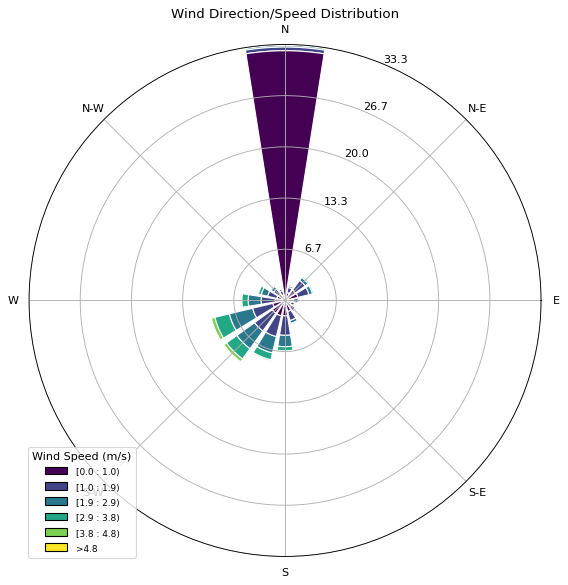

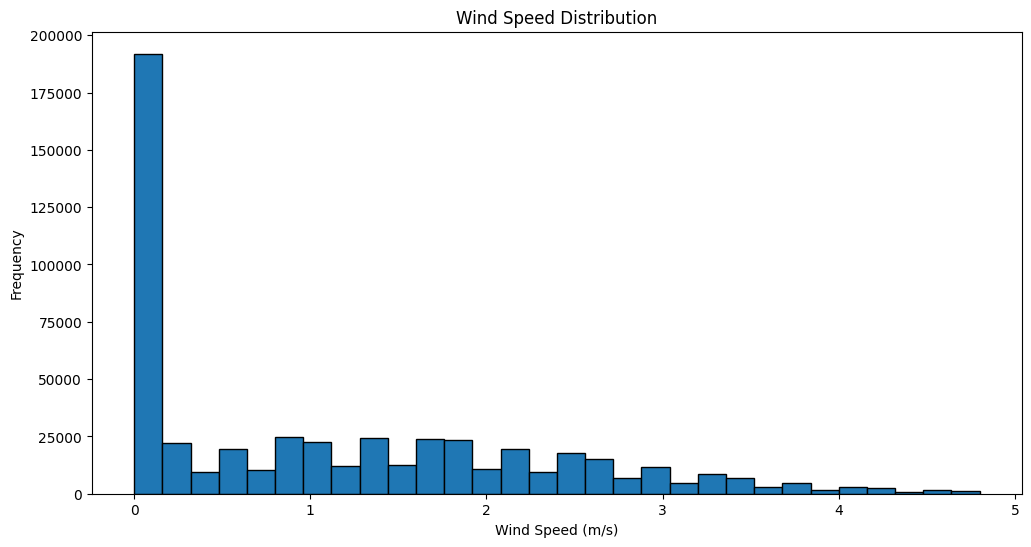

In [15]:
from windrose import WindroseAxes

# Wind Rose (requires windrose package: pip install windrose)
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Direction/Speed Distribution')
plt.show()

# Wind Speed Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['WS'], bins=30, edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.show()

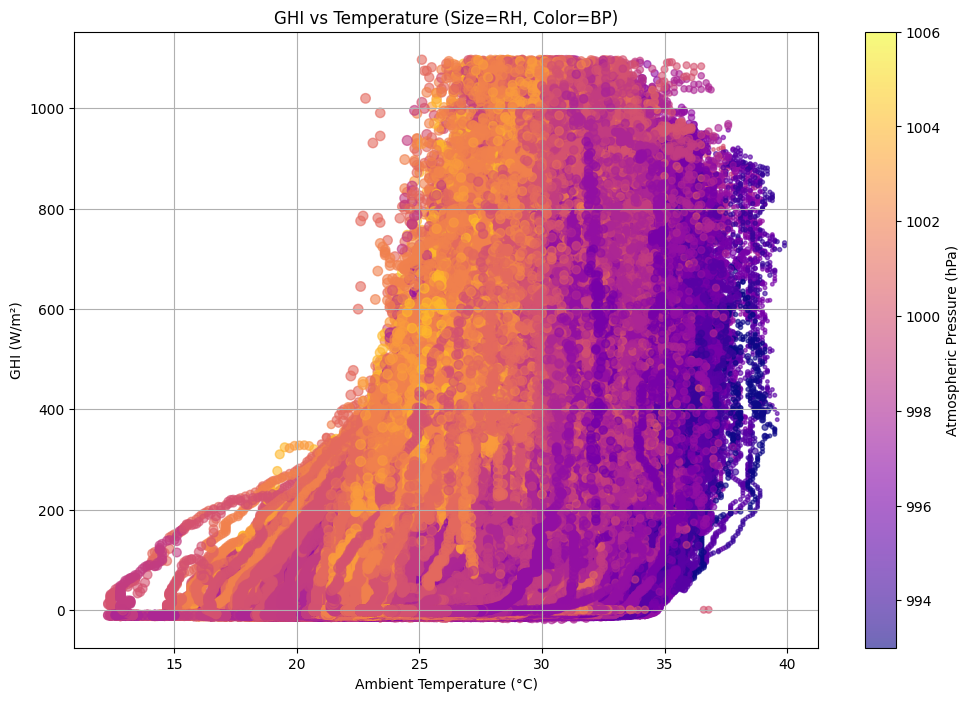

In [16]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df['Tamb'],
    y=df['GHI'],
    s=df['RH']/2,  # Bubble size by RH
    c=df['BP'],     # Color by pressure
    alpha=0.6,
    cmap='plasma'
)
plt.colorbar(scatter, label='Atmospheric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Size=RH, Color=BP)')
plt.grid()
plt.show()